## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

In [2]:
# Loading Dataset

dataset = pd.read_csv("winequality-red.csv")

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dataset.shape

(1599, 12)

In [9]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Data Analysis and Visualization

In [10]:
# Stastical Measures of the Dataset
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


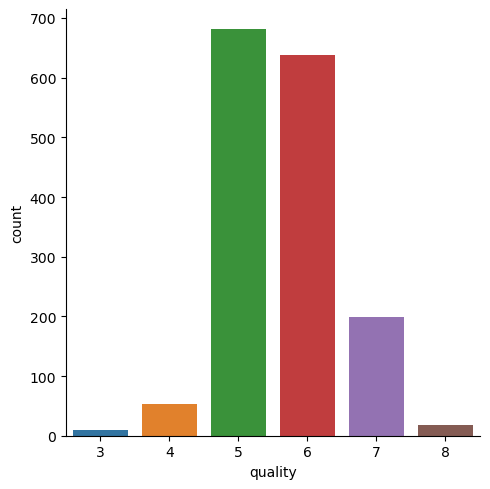

In [11]:
# Number of Values for each quality
sns.catplot(x='quality', data=dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

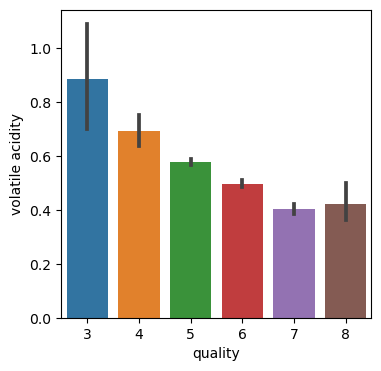

In [13]:
# Volatile Acidity vs Quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y = 'volatile acidity', data = dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

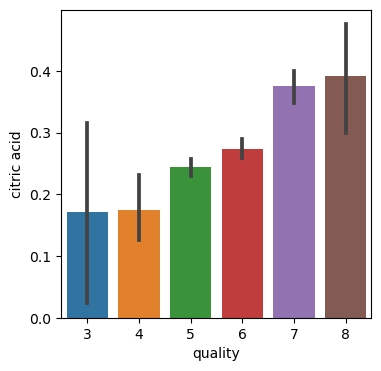

In [14]:
# Citric Acid vs Quality
plot = plt.figure(figsize=(4,4))
sns.barplot(x='quality', y = 'citric acid', data = dataset)

## Correlation

In [15]:
correlation = dataset.corr()

<Axes: >

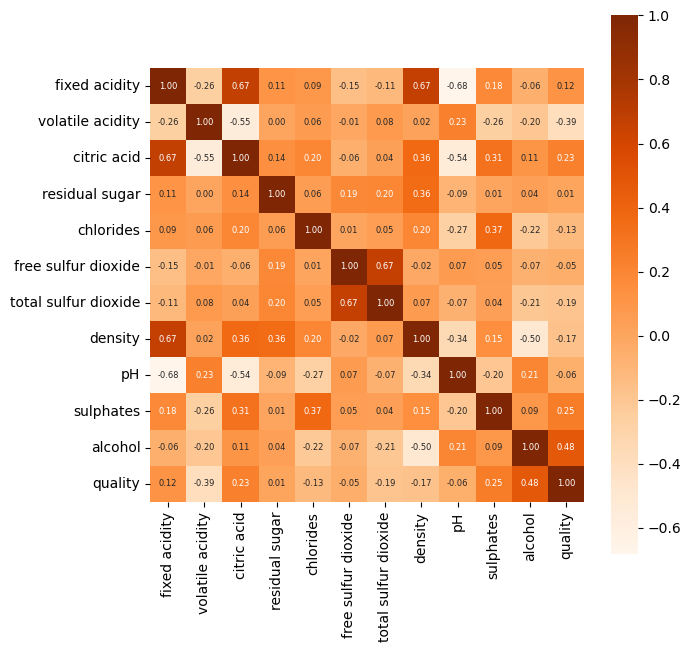

In [34]:
# Construction of heatmap of correlation
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot=True, annot_kws={'size': 6}, cmap='Oranges')

## Data Preprocessing

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X = dataset.drop('quality', axis=1)

### Lable Binarization

In [41]:
Y = dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [42]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

## Model Tranning

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [109]:
model = RandomForestClassifier(n_estimators=500)

In [110]:
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

## Model Evaluation

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
# Accuracy on test data

X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [113]:
print(f"Accuracy score: {test_data_accuracy}.")

Accuracy score: 0.93125.
